In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis"

Mounted at /content/drive/
/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2

In [ ]:
image1 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/train/NORMAL/IM-0015-0001.jpeg"
image2 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/train/PNEUMONIA/person19_bacteria_61.jpeg"
image3 = "/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/train/PNEUMONIA/person1_virus_9.jpeg"

In [ ]:
target_size = (356, 256)

img1 = cv2.resize(cv2.imread(image1, cv2.IMREAD_GRAYSCALE), target_size)
img2 = cv2.resize(cv2.imread(image2, cv2.IMREAD_GRAYSCALE), target_size)
img3 = cv2.resize(cv2.imread(image3, cv2.IMREAD_GRAYSCALE), target_size)

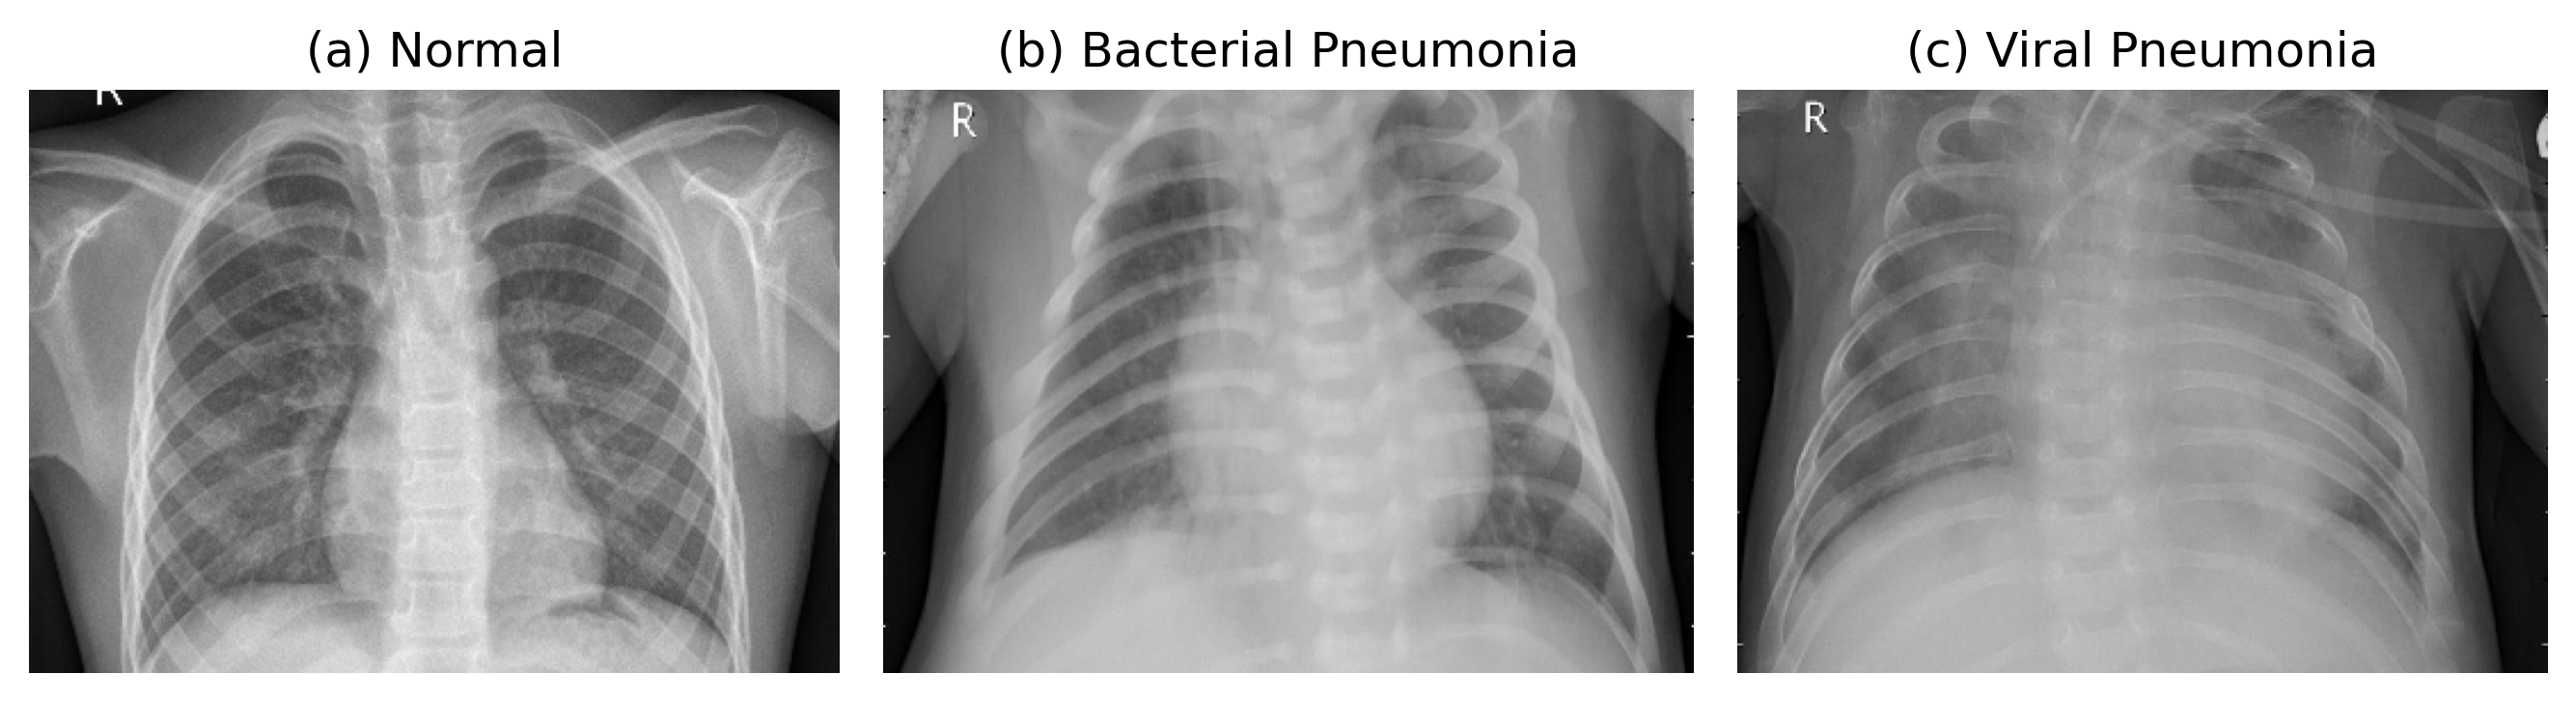

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3), dpi=300)

titles = ['(a) Normal', '(b) Bacterial Pneumonia', '(c) Viral Pneumonia']

for ax, img, title in zip(axes, [img1, img2, img3], titles):
    ax.imshow(img, cmap='gray')
    ax.set_title(title, fontsize=12)
    ax.axis('off')

for ax in axes:
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

In [ ]:
fig.savefig('dataset.png', dpi=600, bbox_inches='tight', pad_inches=0)

In [ ]:
import os
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis'

### Bacterial Pneumonia

In [ ]:
b_input = '/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person14_bacteria_51.jpeg'
b_img1 = '/content/drive/MyDrive/pneumonia_runs/resnet18/gradcam_pneumonia_1.png'
b_img2 = '/content/drive/MyDrive/pneumonia_runs/resnet50/gradcam_pneumonia_1.png'
b_img3 = '/content/drive/MyDrive/pneumonia_runs/densenet121/gradcam_pneumonia_1.png'
b_img4 = '/content/drive/MyDrive/pneumonia_runs/efficientnet_b0/gradcam_pneumonia_1.png'
b_img5 = '/content/drive/MyDrive/pneumonia_runs/mobilenet_v2/gradcam_pneumonia_1.png'
b_img6 = '/content/drive/MyDrive/pneumonia_runs/mobilenet_v3/gradcam_pneumonia_1.png'
b_img7 = '/content/drive/MyDrive/pneumonia_runs/vit_b_16/gradcam_pneumonia_1.png'

### viral pneumonia

In [ ]:
v_input = '/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/PNEUMONIA/person15_virus_46.jpeg'
v_img1 = '/content/drive/MyDrive/pneumonia_runs/resnet18/gradcam_pneumonia_2.png'
v_img2 = '/content/drive/MyDrive/pneumonia_runs/resnet50/gradcam_pneumonia_2.png'
v_img3 = '/content/drive/MyDrive/pneumonia_runs/densenet121/gradcam_pneumonia_2.png'
v_img4 = '/content/drive/MyDrive/pneumonia_runs/efficientnet_b0/gradcam_pneumonia_2.png'
v_img5 = '/content/drive/MyDrive/pneumonia_runs/mobilenet_v2/gradcam_pneumonia_2.png'
v_img6 = '/content/drive/MyDrive/pneumonia_runs/mobilenet_v3/gradcam_pneumonia_2.png'
v_img7 = '/content/drive/MyDrive/pneumonia_runs/vit_b_16/gradcam_pneumonia_2.png'

### Normal

In [ ]:
n_input = '/content/drive/MyDrive/Colab Notebooks/pneumonia-analysis/dataset/chest_xray/test/NORMAL/IM-0433-0001.jpeg'
n_img1 = '/content/drive/MyDrive/pneumonia_runs/resnet18/gradcam_noraml_1.png'
n_img2 = '/content/drive/MyDrive/pneumonia_runs/resnet50/gradcam_noraml_1.png'
n_img3 = '/content/drive/MyDrive/pneumonia_runs/densenet121/gradcam_noraml_1.png'
n_img4 = '/content/drive/MyDrive/pneumonia_runs/efficientnet_b0/gradcam_noraml_1.png'
n_img5 = '/content/drive/MyDrive/pneumonia_runs/mobilenet_v2/gradcam_noraml_1.png'
n_img6 = '/content/drive/MyDrive/pneumonia_runs/mobilenet_v3/gradcam_noraml_1.png'
n_img7 = '/content/drive/MyDrive/pneumonia_runs/vit_b_16/gradcam_noraml_1.png'

In [ ]:
bacterial = [b_input, b_img1, b_img2, b_img3, b_img4, b_img5, b_img6, b_img7]
viral     = [v_input, v_img1, v_img2, v_img3, v_img4, v_img5, v_img6, v_img7]
normal    = [n_input, n_img1, n_img2, n_img3, n_img4, n_img5, n_img6, n_img7]

rows = ['Normal', 'Bacterial Pneumonia', 'Viral Pneumonia']
cols = ['Input', 'ResNet-18', 'ResNet-50', 'DenseNet-121', 'EfficientNet-B0', 'MobileNet-V2', 'MobileNet-V3', 'ViT']

In [ ]:
def load_rgb(path):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    if img is None:
        print(f"Could not read: {path}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [ ]:
data = [normal, bacterial, viral]
images = [[load_rgb(p) for p in row] for row in data]

In [ ]:
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 8,
    "axes.titlesize": 8,
    "figure.dpi": 600
})

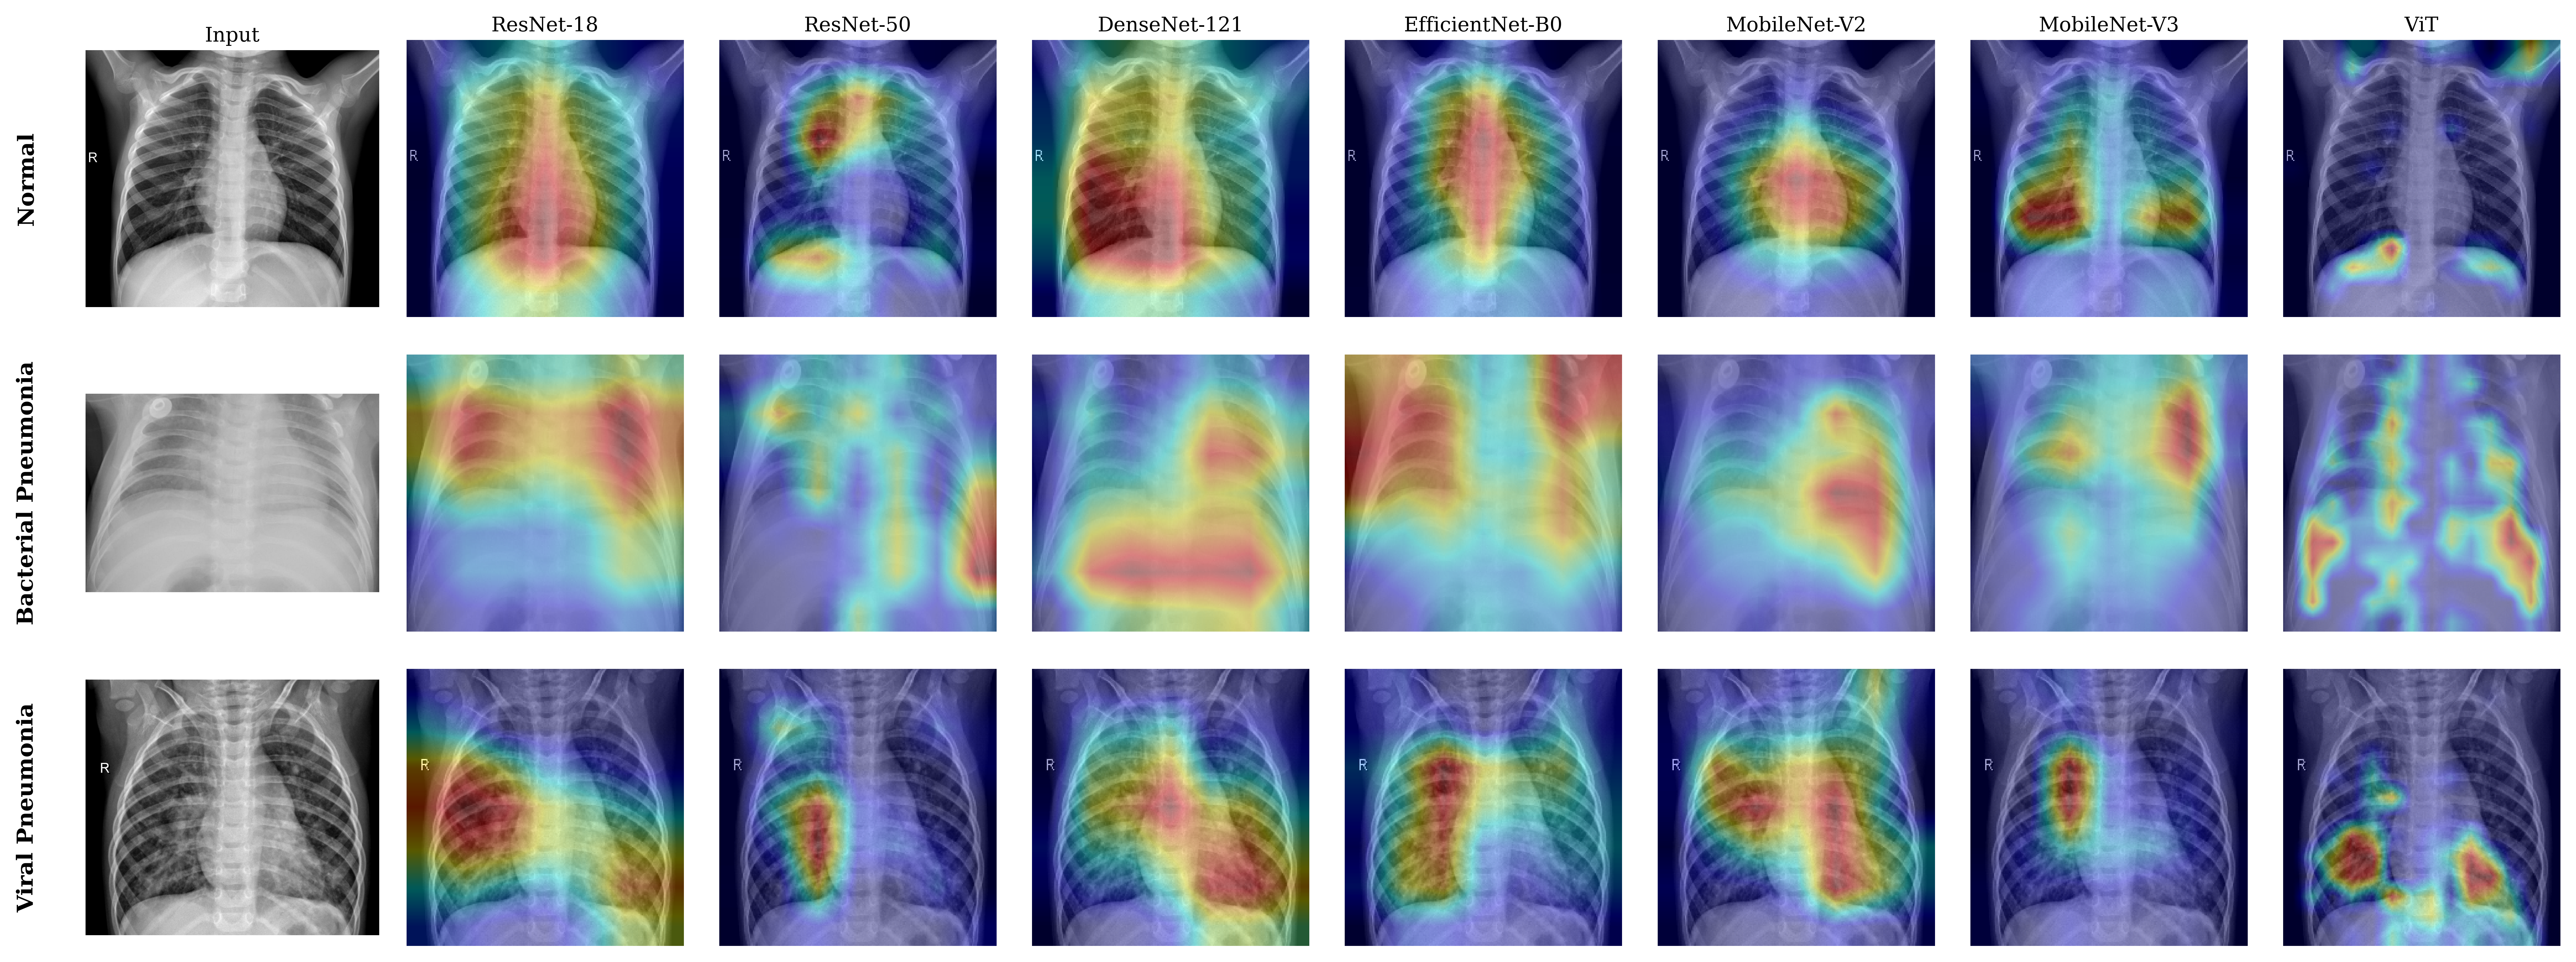

In [ ]:
fig, axes = plt.subplots(3, 8, figsize=(16, 6), dpi=600)

for r, (row_name, row_imgs) in enumerate(zip(rows, images)):
    for c, (col_name, img) in enumerate(zip(cols, row_imgs)):
        ax = axes[r, c]
        if img is not None:
            ax.imshow(img)
        ax.axis('off')
        if r == 0:
            ax.set_title(col_name, fontsize=9, pad=4)
        if c == 0:
            ax.text(-0.2, 0.5, row_name, rotation=90, fontsize=10,
                    fontweight='bold', ha='center', va='center',
                    transform=ax.transAxes)
        ax.set_aspect('equal')

plt.tight_layout()
plt.show()